# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

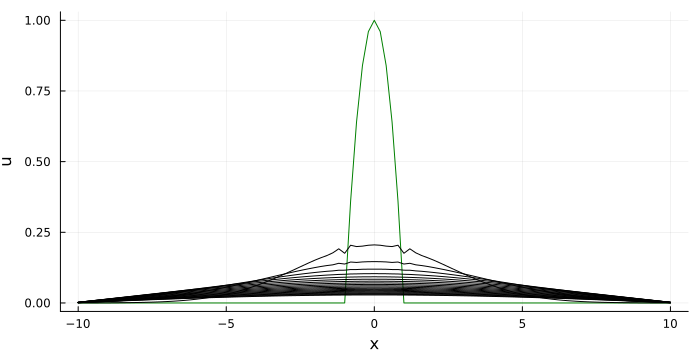

In [76]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
Δx = 2*L/Nx                            # step size (space)
σ = 8                              # CFL
Δt = 0.0000001
#Δt = σ * Δx^2                          # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
θ = 0.5                              # nouveau parametre

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(- σ*(1-θ)*ones(Nx),1 .+ 2*σ*(1-θ)*ones(Nx+1), - σ*(1-θ)*ones(Nx))                               #

B = Tridiagonal(σ*θ*ones(Nx), 1 .- 2*σ*θ*ones(Nx+1), σ*θ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

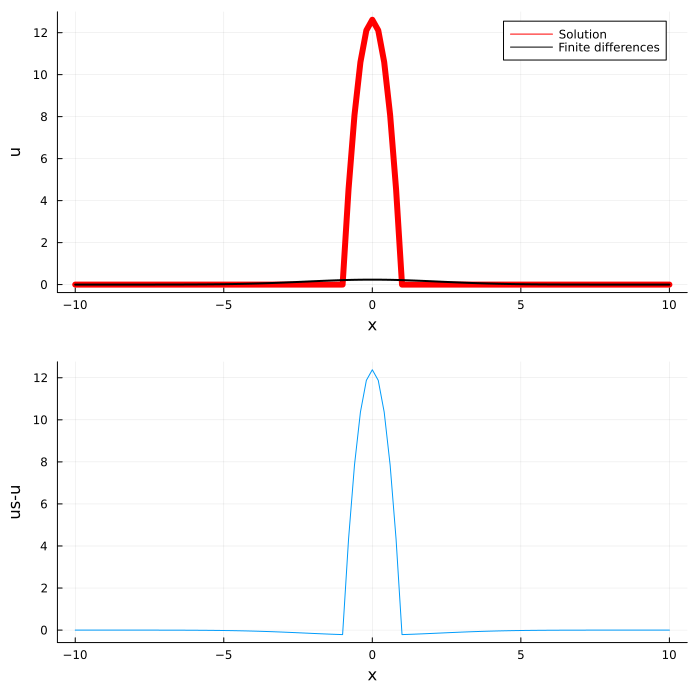

Δx: 0.2	 Δt:1.0e-7	 max error: 12.379988449999242


In [55]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

On reprend les tests de la première tache en faisant varier cette fois-ci θ

On diminue progressivement la valeur de Δx en divisant par 2 à chaque fois, soit en multipliant Nx par 2. 
On fixe σ = 0.4 ; et Δt très petit ici 0.000001 et on commence avec Nx = 100.

Pour θ = 0.25
On observe tout d'abord, que l'erreur obtenue est très grande. ici, max error = 12.4 
Plus on augmente Nx, plus l'erreur diminue. Pour Nx=800 max error = 0.65

On Peut en déduire que le schéma est beaucoup moins précis que Crank-Nicolson.

Pour θ = 0.75, on observe la même chose avec le même ordre de grandeur pour les erreurs.

Donc pour θ = 0.5 le schéma est beaucoup plus précis.


Maintenat, on compare la stabilité. on observe que pour θ < 0.5 on peut remarquer que le schéma n'explose lorsque l'on augmente la valeur de σ (même superieur a 0.5) On en déduit donc que pour θ < 0.5, le schéma est inconditionnelement stable.

Pour θ > 0.5 on perd en stabilité, pour σ grand il n'est pas stable du tout. Cependant, pour σ = 0.7 le schéma explose a partir de θ > 0.8

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, leg

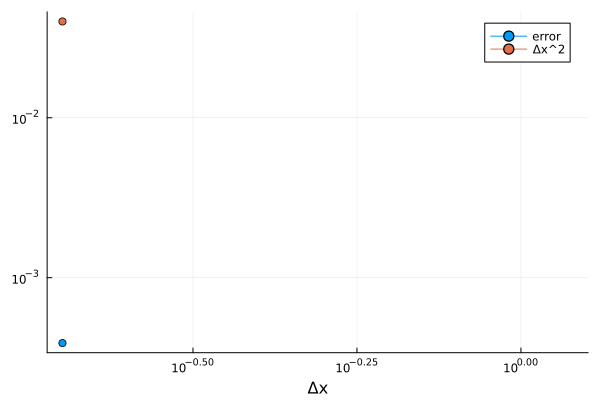

In [19]:
# Precision test
Δx = [ 0.2 ]
errx = [ 0.00039 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")